In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/Users/bulent/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading Time Series Data
We'll be working with a dataset called "Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," which collected CO2 samples from March 1958 to December 2001.

In [2]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

print(co2.head(5))

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


# Indexing with Time Series data
When working with time-series data in Python we should ensure that dates are used as an index, so make sure to always check for that, which we can do by running the following:

In [3]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

The dtype=datetime[ns] field confirms that our index is made of date stamp objects, while length=2284 and freq='W-SAT' tells us that we have 2,284 weekly date stamps starting on Saturdays.

Weekly data can be tricky to work with, so let's use the monthly averages of our time-series instead. This can be obtained by using the convenient resample function, which allows us to group the time-series into buckets (1 month), apply a function on each group (mean), and combine the result (one row per group).

In [4]:
y = co2['co2'].resample('MS').mean()

Here, the term MS means that we group the data in buckets by months and ensures that we are using the start of each month as the timestamp:

In [5]:
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

An interesting feature of pandas is its ability to handle date stamp indices, which allow us to quickly slice our data. For example, we can slice our dataset to only retrieve data points that come after the year 1990:

In [6]:
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

Or, we can slice our dataset to only retrieve data points between October 1995 and October 1996:

In [7]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

# Handling Missing Values in Time-series Data
Real world data tends be messy. As we can see from the plot, it is not uncommon for time-series data to contain missing values. The simplest way to check for those is either by directly plotting the data or by using the command below that will reveal missing data in ouput:

In [8]:
y.isnull().sum()

5

This output tells us that there are 5 months with missing values in our time series.

Generally, we should "fill in" missing values if they are not too numerous so that we don’t have gaps in the data. We can do this in pandas using the fillna() command. For simplicity, we can fill in missing values with the closest non-null value in our time series, although it is important to note that a rolling mean would sometimes be preferable.

In [9]:
y = y.fillna(y.bfill())

Visualizing Time-series Data
When working with time-series data, a lot can be revealed through visualizing it. A few things to look out for are:

seasonality: does the data display a clear periodic pattern?
trend: does the data follow a consistent upwards or downward slope?
noise: are there any outlier points or missing values that are not consistent with the rest of the data?
We can use the pandas wrapper around the matplotlib API to display a plot of our dataset:

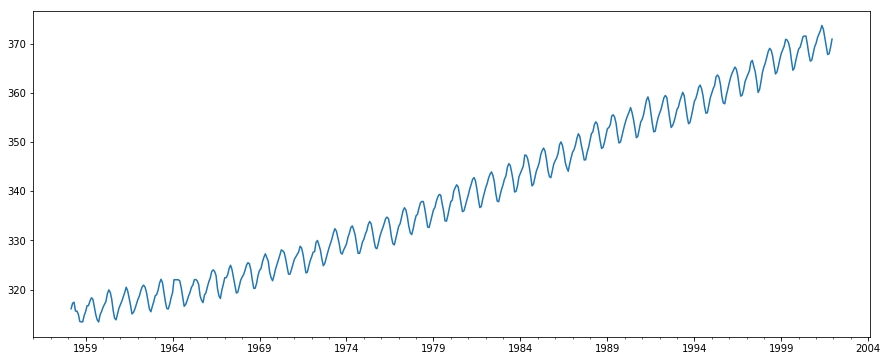

In [10]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has an obvious seasonality pattern, as well as an overall increasing trend. We can also visualize our data using a method called time-series decomposition. As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

Fortunately, statsmodels provides the convenient seasonal_decompose function to perform seasonal decomposition out of the box. If you are interested in learning more, the reference for its original implementation can be found in the following paper, "[STL: A Seasonal-Trend Decomposition Procedure Based on Loess](https://www.wessa.net/download/stl.pdf)."

The script below shows how to perform time-series seasonal decomposition in Python. By default, seasonal_decompose returns a figure of relatively small size, so the first two lines of this code chunk ensure that the output figure is large enough for us to visualize.

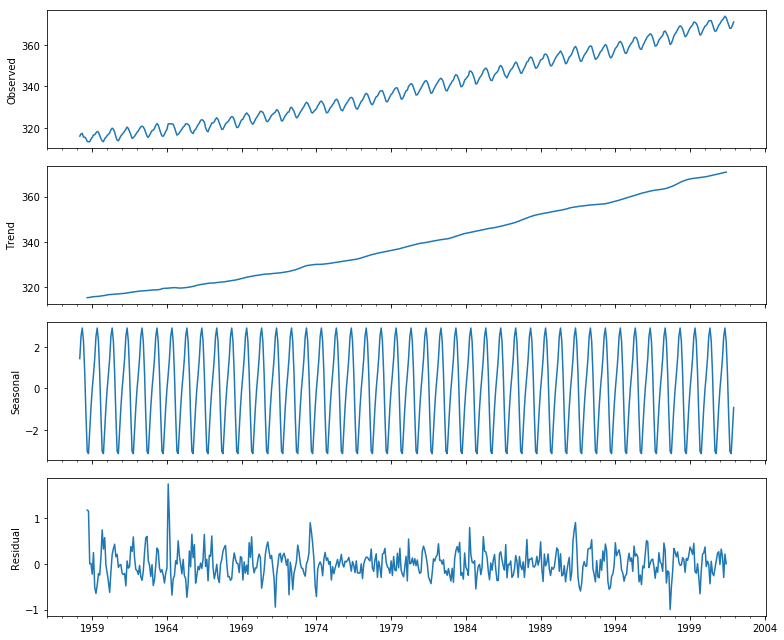

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data. The plot above clearly shows the upwards trend of our data, along with its yearly seasonality. These can be used to understand the structure of our time-series. The intuition behind time-series decomposition is important, as many forecasting methods build upon this concept of structured decomposition to produce forecasts.

# Conclusion
If you've followed along with this guide, you now have experience visualizing and manipulating time-series data in Python.

To further improve your skill set, you can load in another dataset and repeat all the steps in this tutorial. For example, you may wish to read a CSV file using the pandas library or use the sunspots dataset that comes pre-loaded with the statsmodels library: data = sm.datasets.sunspots.load_pandas().data.